In [1]:
## https://github.com/Micro-sheep/efinance
!pip install efinance
!pip install pandas
!pip install matplotlib

In [15]:
# !pip freeze > requirements.txt

In [2]:
import efinance as ef
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import findSystemFonts

# 打印系统中已安装的字体文件路径
font_paths = findSystemFonts()
# print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

MacKTGB2312_font_path = '/Users/encore/Library/Fonts/MacKTGB2312.ttf'  # 替换为实际的字体文件路径
chinese_font = fm.FontProperties(fname=MacKTGB2312_font_path)

# plt.rcParams['font.sans-serif'] = [chinese_font_path]
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置默认字体为中文宋体或其他中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [3]:
import matplotlib as mpl
print(mpl.get_cachedir())

/Users/encore/.matplotlib


In [4]:
stock_code = '600519'

data = ef.stock.get_quote_history(stock_code)

In [5]:
df = pd.DataFrame(data)

In [6]:
df

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,贵州茅台,600519,2001-08-27,-159.23,-159.02,-158.58,-159.56,406318,1.410347e+09,-0.61,0.52,0.83,56.83
1,贵州茅台,600519,2001-08-28,-159.14,-158.76,-158.74,-159.21,129647,4.634630e+08,-0.30,0.16,0.26,18.13
2,贵州茅台,600519,2001-08-29,-158.74,-158.86,-158.74,-158.91,53252,1.946890e+08,-0.11,-0.06,-0.10,7.45
3,贵州茅台,600519,2001-08-30,-158.88,-158.72,-158.63,-158.93,48013,1.775580e+08,-0.19,0.09,0.14,6.72
4,贵州茅台,600519,2001-08-31,-158.71,-158.73,-158.61,-158.78,23231,8.623100e+07,-0.11,-0.01,-0.01,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,贵州茅台,600519,2023-09-22,1805.63,1849.00,1849.96,1792.41,34390,6.287833e+09,3.20,2.81,50.61,0.27
5285,贵州茅台,600519,2023-09-25,1847.50,1832.38,1848.00,1826.59,13979,2.565774e+09,1.16,-0.90,-16.62,0.11
5286,贵州茅台,600519,2023-09-26,1828.00,1816.00,1834.88,1813.10,15762,2.870852e+09,1.19,-0.89,-16.38,0.13
5287,贵州茅台,600519,2023-09-27,1815.00,1814.00,1833.50,1802.80,20880,3.791876e+09,1.69,-0.11,-2.00,0.17


In [7]:
df.columns

Index(['股票名称', '股票代码', '日期', '开盘', '收盘', '最高', '最低', '成交量', '成交额', '振幅', '涨跌幅',
       '涨跌额', '换手率'],
      dtype='object')

In [8]:
[df['涨跌幅'].max(), df['涨跌幅'].min()]

[3887.5, -3500.0]

In [9]:
[df['最高'].max(), df['最高'].min()]

[2539.09, -160.88]

In [10]:
[df['成交量'].max(), df['成交量'].min()]

[406318, 238]

In [11]:
latest_quote = ef.stock.get_latest_quote(stock_code)

In [12]:
latest_quote

,代码,名称,涨跌幅,最新价,最高,最低,今开,涨跌额,换手率,量比,动态市盈率,成交量,成交额,昨日收盘,总市值,流通市值,市场类型,行情ID,更新时间,最新交易日
0,600519,贵州茅台,-0.85,1798.55,1824.98,1797.8,1824.98,-15.45,0.16,0.98,31.4,20538,3.704813e+09,1814.0,2259334553190,2259334553190,沪A,1.600519,2023-09-28 15:59:37,2023-09-28


/Users/encore/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/encore/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/encore/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


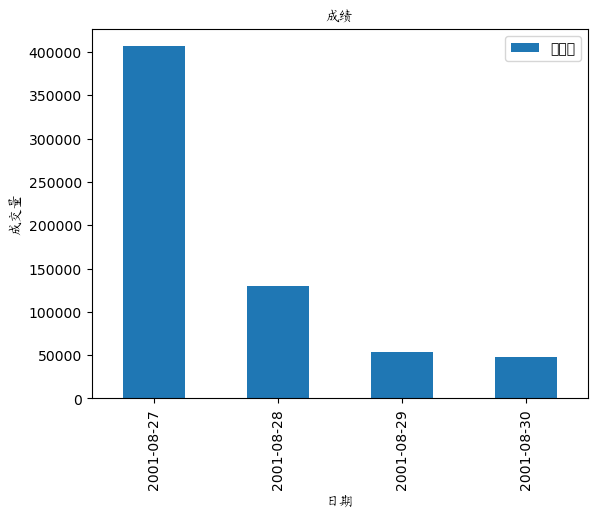

In [13]:
df.head(4)[['日期', '成交量']].plot(kind='bar', x='日期', y='成交量')
plt.title('成绩', fontproperties=chinese_font)
plt.xlabel('日期', fontproperties=chinese_font)
plt.ylabel('成交量', fontproperties=chinese_font)
plt.show()

In [14]:
df[df.日期 == '2001-08-27']

,股票名称,股票代码,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,贵州茅台,600519,2001-08-27,-159.23,-159.02,-158.58,-159.56,406318,1.410347e+09,-0.61,0.52,0.83,56.83
